In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

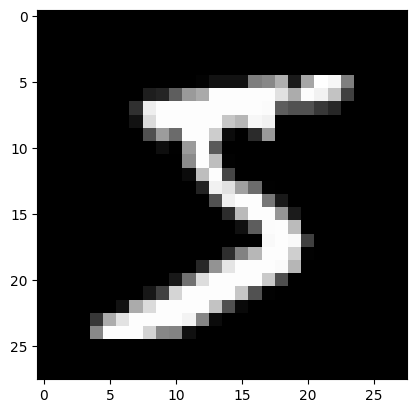

In [4]:
plt.imshow(X_train[0], cmap='gray')

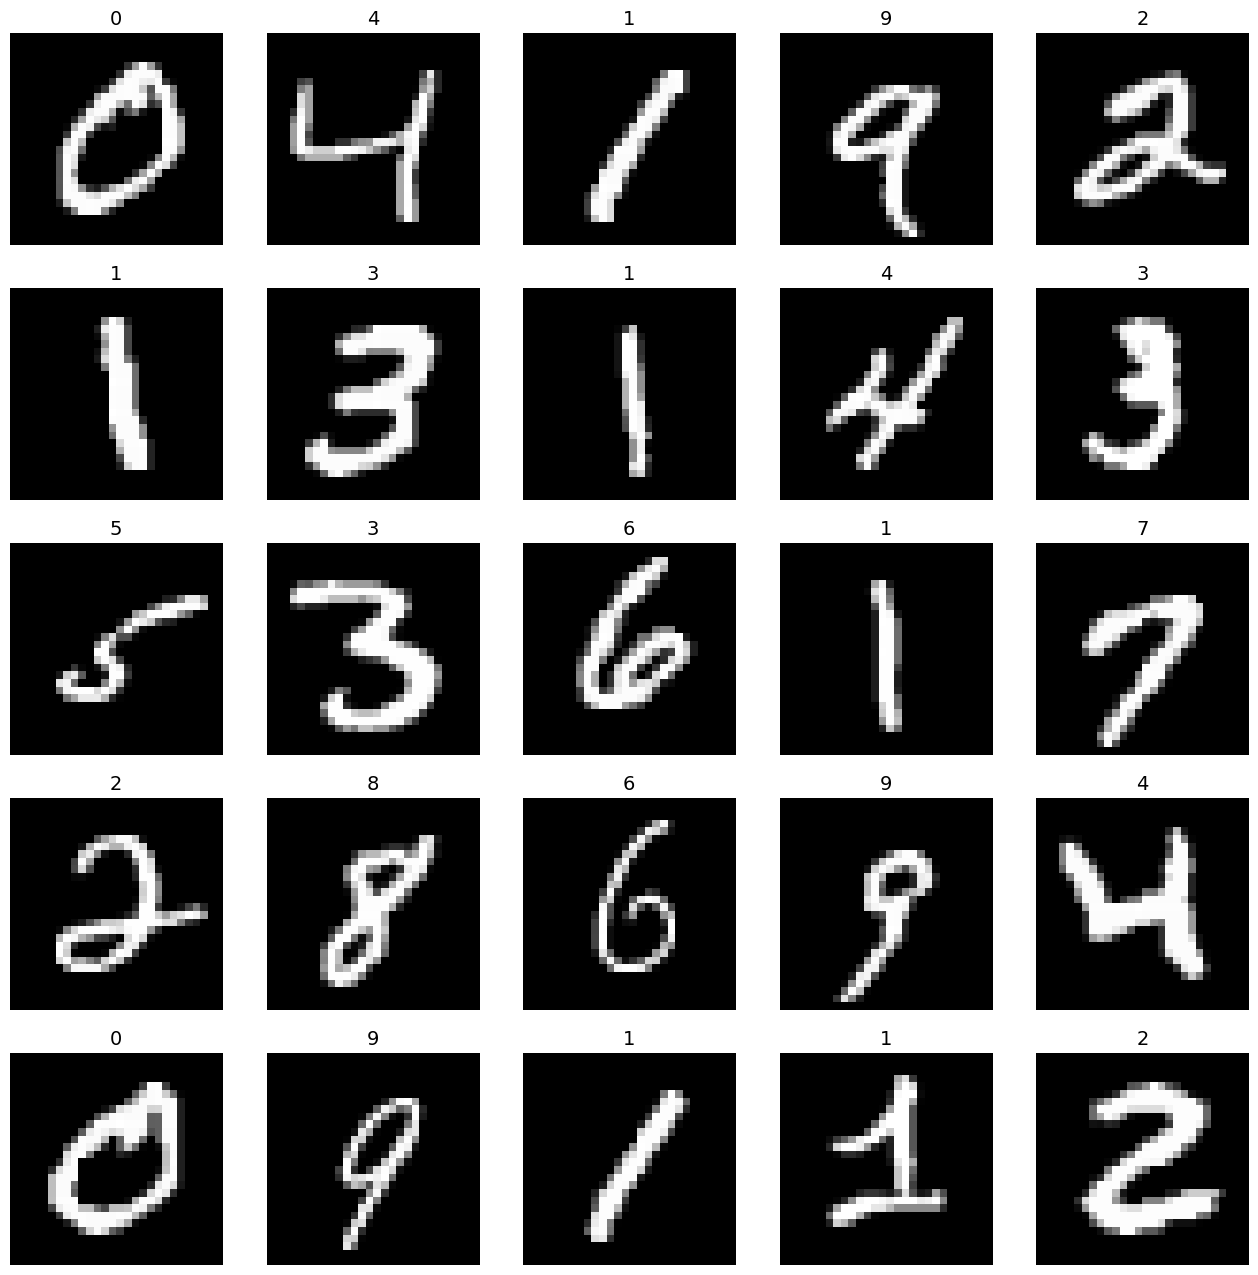

In [5]:
plt.figure(figsize=(16,16)) 
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i], fontsize=14)
    plt.axis('off') # plt.xticks([]), plt.yticks([])

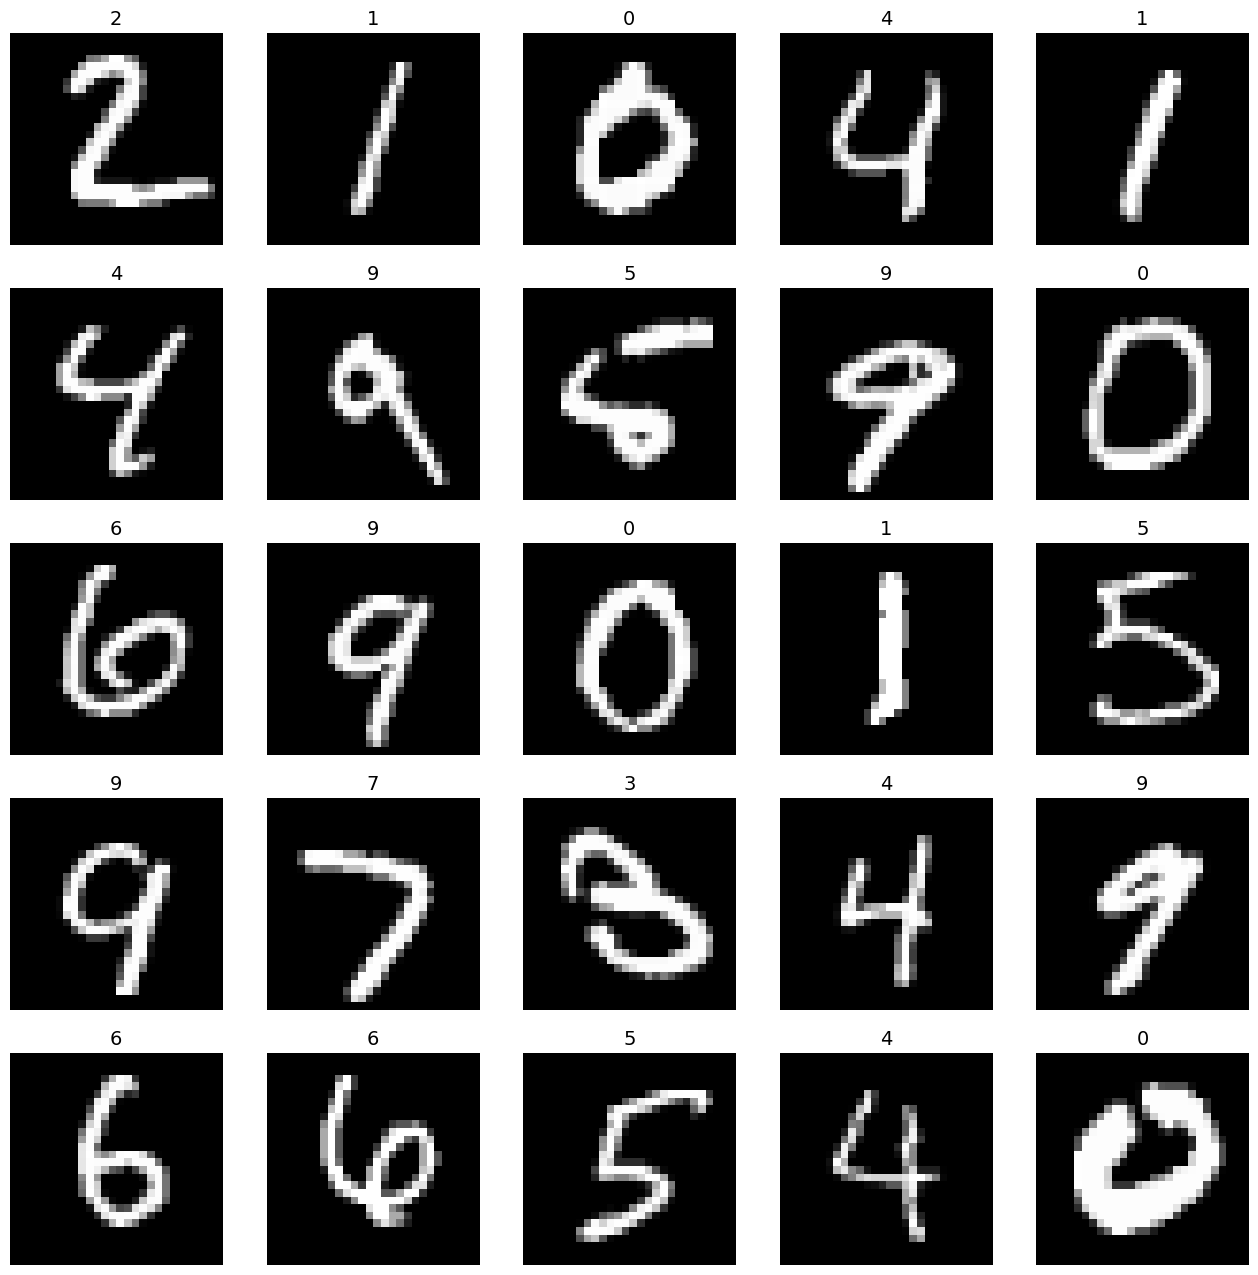

In [6]:
plt.figure(figsize=(16,16)) 
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(y_test[i], fontsize=14)
    plt.axis('off')

### Data Preprocessing

In [7]:
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Normalizing the Data

In [8]:
X_train = X_train / 255
X_test = X_test / 255.

In [9]:
print(X_train[0].shape) # Rows and columns
print(X_train[0].size) # gives total no. of elements

(28, 28)
784


In [10]:
m = np.arange(1,7).reshape(2,3)
m

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
m.flatten()

array([1, 2, 3, 4, 5, 6])

In [12]:
print(m.reshape(m.size))

[1 2 3 4 5 6]


In [13]:
# numpy allow us to give one of new shape parameter as -1 (eg: (2,-1) or (-1,3) but not (-1, -1)). It simply means that it is an unknown dimension and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions'.

X_train = X_train.reshape(-1, X_train[0].size)
X_test = X_test.reshape(-1, X_train[0].size)

In [14]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### Prepare the Output Variable

In [15]:
import seaborn as sns

<Axes: xlabel='count'>

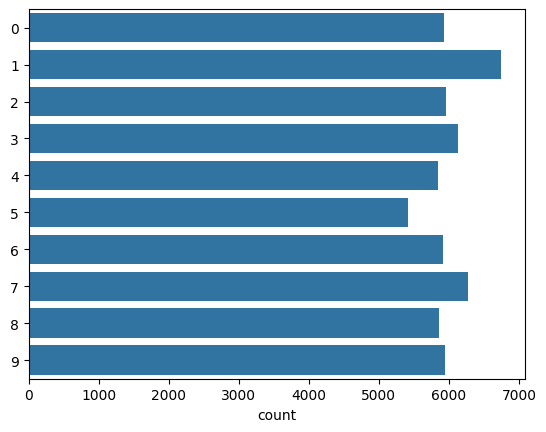

In [16]:
sns.countplot(y=y_train)

In [17]:
y_train.shape

(60000,)

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Build the Model

In [21]:
model = Sequential()

model.add(Dense(512, input_shape=(784,), activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(y_train.shape[1], activation='softmax'))

### Compile the Model

In [22]:
# categorical_crossentropy ( cce ) produces a one-hot array containing the probable match for each category, sparse_categorical_crossentropy ( scce ) produces a category index of the most likely matching category.
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics='accuracy')

### Fit the Model

In [23]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=10
          )

Epoch 1/10


6000/6000 [==============================] - 24s 4ms/step - loss: 0.1850 - accuracy: 0.9433
Epoch 2/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0869 - accuracy: 0.9742
Epoch 3/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0645 - accuracy: 0.9803
Epoch 4/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0483 - accuracy: 0.9849
Epoch 5/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0399 - accuracy: 0.9877
Epoch 6/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0361 - accuracy: 0.9893
Epoch 7/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0306 - accuracy: 0.9906
Epoch 8/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0330 - accuracy: 0.9908
Epoch 9/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0279 - accuracy: 0.9919
Epoch 10/10
6000/6000 [==============================] - 22s 4ms/step -

### Evaluate on test data

In [24]:
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 [==============================] - 23s 2ms/step - loss: 0.1351 - accuracy: 0.9788


[0.13510547578334808, 0.9787999987602234]

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

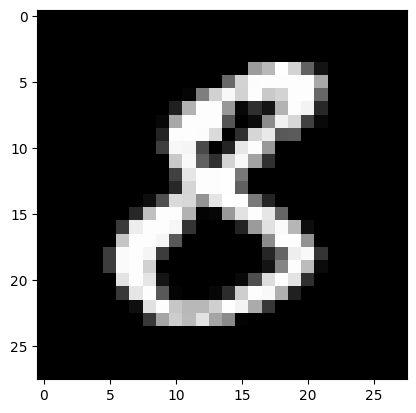

In [26]:
new = X_test[1234]
plt.imshow(new, cmap='gray')

In [27]:
new = new / 255
new = new.reshape(-1,new.size) # One shape dimension can be -1.
model.predict(new).argmax()

1/1 [==============================] - 0s 115ms/step


8

In [28]:
import cv2
image = cv2.imread('Test.png',0)

In [29]:
image.shape

(209, 208)

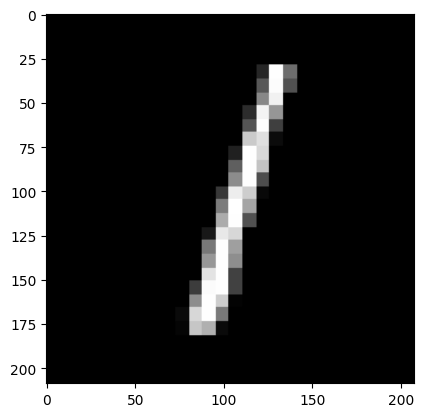

In [30]:
plt.imshow(image, cmap="gray")

In [31]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
image = cv2.resize(image, (28,28))

In [33]:
image = image / 255
image = image.reshape(-1,image.size) # One shape dimension can be -1.
model.predict(image).argmax()

1/1 [==============================] - 0s 33ms/step


1